<a href="https://colab.research.google.com/github/tgi25/home/blob/master/AutoEncoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the MNIST dataset

In [1]:
from tensorflow import keras
from keras.datasets import mnist #importing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ("x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape)
print ("x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape)

x_train shape =  (60000, 28, 28) y_train shape =  (60000,)
x_test shape =  (10000, 28, 28) y_test shape =  (10000,)


### Casting inputs to float32

In [2]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

### Reshaping inputs

In [3]:
INPUT_DIM = 784 #28 by 28

x_train_reshape = x_train.reshape(60000, INPUT_DIM)
x_test_reshape = x_test.reshape(10000, INPUT_DIM)
print (x_train.shape, "=>", x_train_reshape.shape)
print (x_test.shape,  "=>", x_test_reshape.shape)

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### Normalizing the inputs

In [4]:
x_train_reshape /= 255
x_test_reshape  /= 255

### Building the Autoencoder model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

ENCODING_DIM = 32
autoencoder = Sequential()
autoencoder.add(Dense(ENCODING_DIM, activation='relu', input_shape=(INPUT_DIM,)))
autoencoder.add(Dense(INPUT_DIM, activation='sigmoid'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Fitting the Autoencoder

In [7]:
autoencoder_history = autoencoder.fit(x=x_train_reshape, y=x_train_reshape,
                                     epochs=10, batch_size=256,
                                     shuffle=True,
                                     verbose=2)

Epoch 1/10
235/235 - 5s - loss: 0.2793 - 5s/epoch - 23ms/step
Epoch 2/10
235/235 - 4s - loss: 0.1733 - 4s/epoch - 19ms/step
Epoch 3/10
235/235 - 4s - loss: 0.1455 - 4s/epoch - 17ms/step
Epoch 4/10
235/235 - 4s - loss: 0.1292 - 4s/epoch - 19ms/step
Epoch 5/10
235/235 - 4s - loss: 0.1186 - 4s/epoch - 18ms/step
Epoch 6/10
235/235 - 3s - loss: 0.1114 - 3s/epoch - 12ms/step
Epoch 7/10
235/235 - 2s - loss: 0.1062 - 2s/epoch - 10ms/step
Epoch 8/10
235/235 - 2s - loss: 0.1024 - 2s/epoch - 10ms/step
Epoch 9/10
235/235 - 2s - loss: 0.0996 - 2s/epoch - 10ms/step
Epoch 10/10
235/235 - 2s - loss: 0.0975 - 2s/epoch - 9ms/step


### Reconstructing the test images

In [8]:
reconstructed_imgs = autoencoder.predict(x_test_reshape)
print ("Shape of reconstructed images = ", reconstructed_imgs.shape)

Shape of reconstructed images =  (10000, 784)


### Plotting the first 10 original and reconstructed images

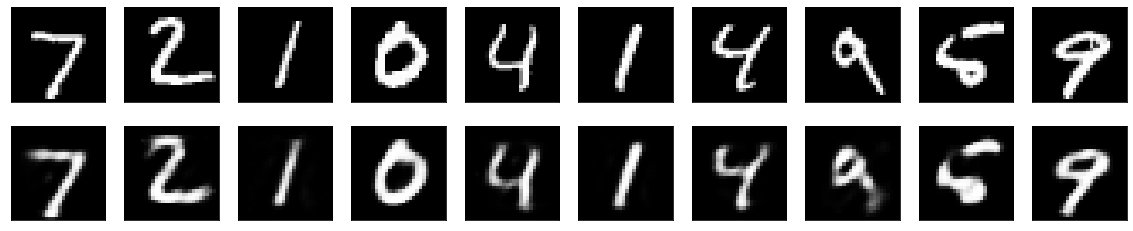

In [9]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



---



### **Loading the FASHION_MNIST dataset** (Different from the MNIST dataset, but they are of same size (28*28))

In [10]:
from keras.datasets import fashion_mnist
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
print (x_train_fashion.shape)
print (y_train_fashion.shape)

(60000, 28, 28)
(60000,)


### **Casting inputs to float32** **bold text**

In [11]:
x_train_fashion = x_train_fashion.astype('float32')
x_test_fashion  = x_test_fashion.astype('float32')

### **Reshaping inputs**

In [12]:
INPUT_DIM = 784 #28 by 28

x_train_fashion_reshape = x_train_fashion.reshape(60000, INPUT_DIM)
x_test_fashion_reshape = x_test_fashion.reshape(10000, INPUT_DIM)
print (x_train_fashion.shape, "=>", x_train_fashion_reshape.shape)
print (x_test_fashion.shape,  "=>", x_test_fashion_reshape.shape)

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### **Normalizing the inputs**

In [13]:
x_train_fashion_reshape /= 255
x_test_fashion_reshape  /= 255

### **Reconstructing Test Dataset of the FASHION_MNIST**

In [14]:
reconstructed_fashion_imgs = autoencoder.predict(x_test_fashion_reshape)
print ("Shape of reconstructed images = ", reconstructed_fashion_imgs.shape)

Shape of reconstructed images =  (10000, 784)


### Plotting the first 10 original and reconstructed images

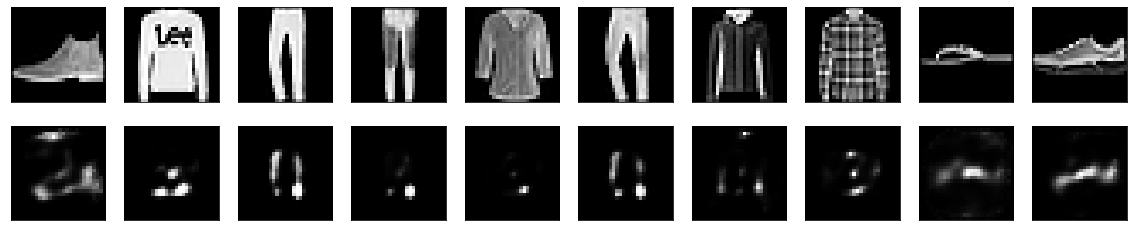

In [15]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_fashion[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_fashion_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
plt.show()